# Projet de gestion de concurrence

- __Francis Anas : anas.francis@etu.univ-cotedazur.fr__
- __Ducrocq Charly : charly.ducrocq@etu.univ-cotedazur.fr__

## Objectif

Mettre en évidence et analyser les différentes difficultés et les résolutions possibles de celles-ci de la programmation concurrentielle. 
Pour ce faire, nous utiliserons le langage de programmation python.

## Sommaire

1. [Objectif](#Objectif)
1. [Les différente bibliothèque de threading python](#Les-différente-bibliothèque-de-threading-python)
1. [Les mécanismes de synchronisation en Python](#Les-mécanismes-de-synchronisation-en-Python)
1. [Définitions de quelques procédures pour initialiser une grille à partir d'un fichier de configuration](#Définitions-de-quelques-procédures-pour-initialiser-une-grille-à-partir-d'un-fichier-de-configuration)
    1. [Définition de la grille](#Définition-de-la-grille)
    1. [Définition d'un obstacle](#Définition-d'un-obstacle)
    1. [Définition d'une personne](#Définition-d'une-personne)
    1. [Construction d'une image pour OpenCV](#Construction-d'une-image-pour-OpenCV)
    1. [Utilisation des procédures précédentes pour créer une nouvelle grille qui sera sauvegardée dans un fichier](#Utilisation-des-procédures-précédentes-pour-créer-une-nouvelle-grille-qui-sera-sauvegardée-dans-un-fichier)
1. [Solution itérative](#Solution-itérative)
    1.  [Avec trace mais sans visualisation](#Avec-trace-mais-sans-visualisation)
    1.  [Visualisation de chacune des itérations avec Matplotlib](#Visualisation-de-chacune-des-itérations-avec-Matplotlib)
    1.  [Visualisation de chacune des itérations avec OpenCV](#Visualisation-de-chacune-des-itérations-avec-OpenCV)
    1.  [Sans trace mais avec visualisation](#Sans-trace-mais-avec-visualisation)
1. [Notre travail](#Notre-travail)
    1. [Scénario 1](#Scénario-1---version-itérative)
    1. [Scénario 2](#Scénario-2---version-1-thread-par-personne)
    1. [Scénario 3](#Scénario-3---version-1-thread-pour-1/4-de-la-grille)
    1. [Comparaison des trois approches](#Comparaison-des-trois-approches)
1. [Export du notebook dans un fichier python](#Export-du-notebook-dans-un-fichier-python)

## Les différente bibliothèque de threading python

- *threading*
    - Module le plus utilisé dans python pour l'utilisation de thread. Il élabore des interfaces haut-niveau de fils d'exécutions multiples. Ce module étant basé sur le module *_thread*, il fournit tous les outils et fonctionnalités que fournisse le module *_thread*.
- *_thread*
    - Ce module fournit les primitives de bas niveau pour travailler avec de multiples fils d'exécution; plusieurs fils d'exécution de contrôle partagent leur espace de données global. Pour la synchronisation, de simples verrous (aussi appelés des mutexes ou des binary semaphores) sont fournis.
- *_dummy_thread*
    - Ancêtre du module *_thread*. Aujourd'hui obsolète.
- *dummy_threading*
    - Ancêtre du module *threading*. Aujourd'hui obsolète.
- Autre alternative : *multiprocessing & multiprocessing.shared_memory*
    - La combinaison de ces deux module permet d'obtenir un équivalent d'une thread. Cependant, son utilisation ne ferait que compliquer le code inutilement.
    
En somme : nous utiliserons la bibliothèque *threading*. Ce module est complet et simple d'utilisation.

 ### La bibliothèque "threading"

##### Création d'une thread :

Les fonctions utilisées pour cela sont le constructeur Thread() et la fonction de demarrage start().

#### Attente d'une thread

La fonction join() permet d'attendre la fin du thread.

#### Exemple

In [1]:
#!/usr/bin/python
import threading
import time

# thread function to start

def print_function():
    print("Hello world!\n")


x = threading.Thread(target=print_function, ) # creating and initializing thread
x.start() 

Hello world!



## Les mécanismes de synchronisation en Python

### Pourquoi avoir besoin de ces mécanisme ?
L'utilisation de plusieurs threads ne permet pas de maitriser l'ordre d'exécution de celle-ci.
#### Mise en évidence du flot d'execution de plusieur thread

In [60]:
import threading
import time

N = 10;

def thread_function(i):
    time.sleep(2) #Necessaire à la mise en evidence
    print(i, sep='', end='')


print("Lancement de ", N ," threads :")
    
i=0
while i<N :
    i=i+1
    x = threading.Thread(target=thread_function, args=(i,))
    x.start()

Lancement de  10  threads :
10728514693

### Les verrous
Les verrous permettent de limiter l'accès à une zone sensible à une seul thread. Celles-ci devront acquérir ce verrou et finiront par le relâcher après avoir passé la zone sensible. Si, lorsqu'une une thread voudra acquérir un verrou, celui-ci serait déjà acquis par une autre thread, alors la thread courant ne pourra pas reprendre son exécution tant que le verrou ne sera pas relâché.
#### Exemple - Mise en évidence de l'intérêt d'un verrou

In [61]:
import threading
import time

N = 1000

left = 0
right = 0
total = 0


def incr_function(leftOrRight):
    global total
    global right
    global left
    i=0
    while i<N :
        i=i+1
        save = total
        print('',end='');
        if leftOrRight :
            left = left+1
        else :
            right = right+1
        total = save +1

print("Lancement de ", N ," threads :")
x = threading.Thread(target=incr_function, args=(0,))
y = threading.Thread(target=incr_function, args=(1,))
z = threading.Thread(target=incr_function, args=(0,))
t = threading.Thread(target=incr_function, args=(1,))
x.start()
y.start()
z.start()
t.start()
x.join()
y.join()
z.join()
t.join()
print("total expected =",N+N+N+N)
print("total got =", total)

Lancement de  1000  threads :
total expected = 4000
total got = 1076


#### Exemple - Avec un verrou

In [62]:
import threading
import time

N = 1000

left = 0
right = 0
total = 0

verrou = threading.Lock()


def incr_function(leftOrRight):
    global total
    global right
    global left
    i=0
    while i<N :
        verrou.acquire()
        i=i+1
        save = total
        print('',end='');
        if leftOrRight :
            left = left+1
        else :
            right = right+1
        total = save +1
        verrou.release()


print("Lancement de ", 4 ," threads :")
x = threading.Thread(target=incr_function, args=(0,))
y = threading.Thread(target=incr_function, args=(1,))
z = threading.Thread(target=incr_function, args=(0,))
t = threading.Thread(target=incr_function, args=(1,))
x.start()
y.start()
z.start()
t.start()
x.join()
y.join()
z.join()
t.join()
print("total expected =",N+N+N+N)
print("total got =", total)

Lancement de  4  threads :
total expected = 4000
total got = 4000


### Les Semaphores
Les Sémaphores sont proches des verrous a la différence qu’ils permettent leur acquisition à plusieurs threads (alors que le verrou ne le permet qu'à une seule). 

Donc un sémaphore est un objet qu'on initialisera à une certaine valeur X entier. Cette valeur X correspond aux nombre de threads qui peuvent acquérir le sémaphore. Lorsque de son acquisition par une cette valeur va diminuer et elle augmentera lorsqu’elle sera relâchée. Si X=0, toutes threads qui souhaitera l'acquérir sera mis en pause jusqu'à ce que X augmente.

#### Exemple

In [64]:
import threading

sem = threading.Semaphore(1)

def fun1():
    print("fun1 demarre")
    sem.acquire()
    for loop in range(1,4):
        print("fun1 en cours ... {}".format(loop))

    sem.release()
    print("fun1 terminée")


def fun2():
    print("fun2 demarre")
    while not sem.acquire(blocking=False): # check tant qu'on ne peut pas recuperer le semapghore du t1 
        print("Fun2 Pas de Semaphore dispo") # on fait un affichage tant que la semaphore n'est pas libérer par la fun1() si 
        # fun()1 prend la semaphore avant fun2(). Dans l'autre cas on n'aura pas à entrer dans cette boucle quasi-infinie
        
    else:
        print("\n fun2() recoit Semphore \n")
        for loop in range(1, 4): # une loop pour voir la progression de cette fonction
            print("Fun2 en cours ... {}".format(loop))
            
    sem.release()

t1 = threading.Thread(target = fun1)
t2 = threading.Thread(target = fun2)
t1.start()
t2.start()



fun1 demarre
fun1 en cours ... 1
fun1 en cours ... 2
fun1 en cours ... 3
fun1 terminée
fun2 demarre

 fun2() recoit Semphore 

Fun2 en cours ... 1
Fun2 en cours ... 2
Fun2 en cours ... 3


Dans l'exemple ci-dessus, nous avons créé un sémaphore initialisé à 1 qui va incrémenter et décrémenter selon le thread qui va l'utiliser en premier.
On a 2 threads. Si le thread 1 commence et finis avant le commencement du thread 2 la phrase "Fun2 Pas de Semaphore dispo"  ne sera pas affichée. 
En revanche si la fonction fun1() prend le sémaphore et que la fonction fun2() démarre aussi, la fonction fun2() affichera cette  phrase tant que le sémaphore est utilisé.  

 ### Les Moniteurs
 Les moniteurs sont des classes qui permettent la synchronisation de plusieurs flots d'exécution. Ils fournissent des méthodes qui, selon certaine condition, mettront en attentes le thread courant. En python, cela ce fait avec l'appelle de la fonction *wait()* par le biais de la déclaration d'un objet de type *Condition*. Cet appel est réalisé dans une boucle *while* vérifiant une condition propre au moniteur, le tout après avoir utilisé un objet de type *Lock* qui fournira un équivalent au mot clé *SYNCHRONIZED* en Java.
#### Exemple

In [65]:
import threading

# Class monitor pour gérer un parking qui a une capacité, capacity
# Nous avons pris l'exemple du TD qu'on a fait en cours.
# Selon la variable freePlaces on bloquera la fonction tackPlace ou freePlace
# Par exemple, la fonction tackPlace ne pourra pas incrémenter la variable freePlaces tant qu'il n'y a pas
# de place libre, donc elle va faire wait(). Quand la fonction freePlace, décrémente cette variable, elle notifiera le thread
# ayant executé la fonction takePlace afin qu'il continue son execution.

class CarParkingMonitor :
    def __init__(self, capacity) :
        self.capacity = capacity
        
        self.freePlaces = capacity
        self.useLock = threading.Lock() 
        self.useAvailable = threading.Condition(self.useLock)
    
    ## prend un place libre ou attend qu'une se libère
    def takePlace(self) :
        with self.useLock :
            while self.freePlaces <=0 :
                self.useAvailable.wait()
            self.freePlaces=self.freePlaces-1
            self.useAvailable.notifyAll()
        
    ## prend une voiture ou attend qu'une soit disponible
    def freePlace(self) :
        with self.useLock :
            while self.freePlaces >= self.capacity :
                self.useAvailable.wait()
            self.freePlaces=self.freePlaces+1
            self.useAvailable.notifyAll()

monitor = CarParkingMonitor(3)
## permet au différent appel à la fonction print() de ne pas entrer en concurrence
printLock = threading.Lock()

def whoArrive(i) :
    global monitor
    global printLock
    
    printLock.acquire()
    if monitor.freePlaces==0 : 
        print(i,"is waiting to park")
    printLock.release()
    
    monitor.takePlace()
    
    printLock.acquire()
    print(i,"parked")
    printLock.release()
    
    
def whoLeave(i) :
    global monitor
    global printLock
    
    printLock.acquire()
    if monitor.freePlaces!=0 : 
        print(i,"is waiting to leave")
    printLock.release()
    
    monitor.freePlace()
    
    printLock.acquire()
    print(i,"leaved")
    printLock.release()

# creation de 10 "personne" qui veulent rendre un véhicule
for i in range(1,10) :
    t1 = threading.Thread(target = whoArrive, args=(i,))
    t1.start()

# creation de 10 "personne" qui veulent emprunter un véhicule
for i in range(1,10) :
    t2 = threading.Thread(target = whoLeave, args=(10+i,))
    t2.start()

1 parked
2 parked
3 parked
4 is waiting to park
5 is waiting to park
6 is waiting to park
7 is waiting to park
8 is waiting to park
9 is waiting to park
11 leaved
8 parked
12 leaved
4 parked
13 leaved
7 parked
14 leaved
5 parked
16 is waiting to leave
16 leaved
9 parked
6 parked
15 leaved
17 leaved
18 is waiting to leave
18 leaved
19 is waiting to leave
19 leaved


## Définitions de quelques procédures pour initialiser une grille à partir d'un fichier de configuration

<span style="color:red">Vous ne pouvez pas modifier les classes/procédures/fonctions suivantes</span>

In [8]:
def is_running_from_ipython():
    # Renvoie True si on execute le code depuis un notebook
       from IPython import get_ipython
       return get_ipython() is not None

# Permet de savoir qui exécute le code
import platform
MICHEL = ('michel' in platform.node()) or ('charvin' in platform.node())

In [9]:
class Debug:
    def __init__(self, debug=False):
        self.debug = debug
        
    def affiche(self, *args):
        if self.debug:
            print(args)
            
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [66]:
# Différents imports
import copy
import math
import time
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
# Reglage de l'affichage

# Définition des affichage possible définition
try :
    import affichage
except :
    !echo 'Aucun = 0' >affichage.py
    !echo 'tkinter = 1' >>affichage.py # Not implemented
    !echo 'OpenCV = 2' >> affichage.py # Not completly implemented

    !echo 'PERSONNE = (0.0, 0.0, 1.0)' >>affichage.py
    !echo 'IMMOBILE = (1.0, 0.0, 0.0)' >>affichage.py
    !echo 'OBSTACLE = (0.0, 1.0, 0.0)' >>affichage.py
    !echo 'EMPTY = (1.0, 1.0, 1.0)' >>affichage.py
    !echo 'ARRIVEE = (0.0, 0.0, 0.0)' >>affichage.py # Not used
    import affichage
    
import cv2

UI = affichage.OpenCV

In [12]:
if MICHEL:
    petite_grille = "maps/map-initial.txt" # fichier décrivant une petite grille
    grande_grille = "maps/map-final.txt"  # fichier décrivant une grande grille
    debug = Debug(True)
    
petite_grille = "maps/map-initial.txt" # fichier décrivant une petite grille
grande_grille = "maps/map-final.txt"  # fichier décrivant une grande grille
debug = Debug(True)

In [13]:
# Constant définition
try :
    import const
except: 
    !echo 'EMPTY = 0' >const.py
    !echo 'OBSTACLE = 1' >>const.py
    !echo 'PERSONNE = 2' >> const.py
    !echo 'IMMOBILE = 3' >> const.py
    !echo 'ARRIVEE = 4' >> const.py
    import const

In [14]:
# Lecture du fichier de configuration
def open_file(filename, debug):
    debug.affiche("Ouverture du fichier", filename)
    fileMap = open(filename, 'r')
    return fileMap

file = open_file(petite_grille, debug)

('Ouverture du fichier', 'maps/map-initial.txt')


### Définition de la grille

In [15]:
def read_grid_size(file, debug):
    line = file.readline()
    while line[0]=='#':	# on saute les commentaires
        line = file.readline()
    
    # Lecture de la taille de la grille
    while line[0]!='#':	# on lit jusqu'au prochain commentaires
        if (line[0]=='X'):
            X = int(line.split(' ')[1])
        if (line[0]=='Y'):
            Y = int(line.split(' ')[1])
        line = file.readline()

    debug.affiche("Simulation pour une grille:", X, "*", Y)
    
    return X, Y

In [16]:
X, Y = read_grid_size(file, debug)

('Simulation pour une grille:', 10, '*', 10)


In [17]:
# Definition de la grille
class Grille:
    # Crée un objet list
    def __init__(self, Xmax, Ymax, UI, debug):
        debug.affiche("Initilisation de l'objet grille")
        self.Xmax = Xmax
        self.Ymax = Ymax
        if const.EMPTY==0:
            self.map = np.zeros((Xmax, Ymax))
        elif const.EMPTY==1:
            self.map = np.ones((Xmax, Ymax))
        else:
            self.map = np.array(Xmax, Ymax)
            for i in range(Xmax):
                for j in range(Ymax):
                    self.map[i,j] = const.EMPTY
        self.mapList = []
        self.obstacleList = []
        self.personneList = []
        self.debug = debug
        self.UI = UI

    def SetObstacle(self, obstacle):
        for x in range(obstacle.Xmin, obstacle.Xmax+1):
            for y in range(obstacle.Ymin, obstacle.Ymax+1):
                self.map[x][y] = const.OBSTACLE
        self.obstacleList += [obstacle]

    def SetPersonne(self, personne):
        if self.map[personne.X][personne.Y]==const.EMPTY:
            # la case est vide
            self.map[personne.X][personne.Y] = const.PERSONNE
            self.personneList += [personne]
            return True
        else:
            debug.affiche("Personne non créée, la place est occupée", personne.X, personne.Y)
            return False
        
    def removePersonne(self,personne):
        self.personneList.remove(personne)
        
    def isCellEmpty(self, x, y):
        return self.map[x][y]==const.EMPTY
    
    def Set(self, x, y, status):
        self.map[x][y] = status
        
    def Save(self, name):
        with open(name, 'w') as file:
            file.write("# taille de la grille\n")
            file.write("X "+str(self.Xmax)+"\n")
            file.write("Y "+str(self.Ymax)+"\n")
            file.write("# position des obstacles\n")
            file.write("# Xmin Xmax Ymin Ymax\n")
            file.write("# si pas obstacle : mettre -1 comme valeur\n")
            file.write("# "+str(len(self.obstacleList))+" obstacles\n")
            for o in self.obstacleList:
                file.write(str(o.Xmin)+" "+str(o.Xmax)+" "+str(o.Ymin)+" "+str(o.Ymax)+"\n")
            file.write("# position initiale des personnes (X, Y) et case de sortie (X, Y)\n")
            file.write("# "+str(len(self.personneList))+" personnes\n")
            for p in self.personneList:
                file.write(str(p.X)+" "+str(p.Y)+" "+str(p.Xsortie)+" "+str(p.Ysortie)+"\n")
                
    # Solution imparfaite car une personne peut être bloquée par un obstacle
    def Simulation(self):
        if self.debug.debug or self.UI==affichage.OpenCV:
            self.mapList.append(copy.copy(self.map))
        if self.UI==affichage.OpenCV:
            cv2.imshow("img", createImage(self.map))
            cv2.waitKey(500)
    
        while len(self.personneList)>0: # il y a encore une personne dans la liste qui peut bouger
            for personne in self.personneList:
                end, immobile = personne.deplacePersonne(self, self.debug)
                if end:
                    self.debug.affiche("Une personne vient de sortir, il reste", len(self.personneList), "personnes")
            if self.debug.debug or self.UI==affichage.OpenCV:
                self.mapList.append(copy.copy(self.map))
                if self.UI==affichage.OpenCV:
                    cv2.imshow("img", createImage(self.map))
                    cv2.waitKey(500)
    
        if self.UI==affichage.OpenCV:
            cv2.destroyAllWindows()

In [18]:
# Creation de la grille
grid = Grille(X, Y, affichage.Aucun, debug)

("Initilisation de l'objet grille",)


### Définition d'un obstacle

In [19]:
class Obstacle():
    def __init__(self, grid,  Xmin, Xmax, Ymin, Ymax, debug):
        self.Xmin = Xmin
        self.Xmax = Xmax
        self.Ymin = Ymin
        self.Ymax = Ymax
        self.debug = debug
        grid.SetObstacle(self)
        debug.affiche("Création de l'obstacle (", Xmin, Xmax, ") - (", Ymin, Ymax, ")")

In [20]:
def read_obstacles(file, grid, Obstacle, debug):
    # Lecture de la liste des obstacles et placement sur la grille
    line = file.readline()
    while line[0]=='#':	# on saute les commentaires
        line = file.readline()

    while line[0]!='#':	# on lit jusqu'au prochain commentaires
        coordonnee = line.strip().split(' ')
        if int(coordonnee[0])>=0:
            assert (int(coordonnee[0])>0 and int(coordonnee[2])>0)
            assert (int(coordonnee[1])<X)
            assert (int(coordonnee[3])<Y)
            Obstacle(grid, int(coordonnee[0]), int(coordonnee[1]), int(coordonnee[2]), int(coordonnee[3]), debug)
        else:
            debug.affiche("obstacle non créé", coordonnee)
        line = file.readline()        

    debug.affiche(len(grid.obstacleList), "obstacles ont été créés")

In [21]:
# On lit tous les obstacles contenus dans le fichier de configuration
read_obstacles(file, grid, Obstacle, debug)

('obstacle non créé', ['-1', '-1', '-1', '-1'])
("Création de l'obstacle (", 1, 1, ') - (', 2, 7, ')')
("Création de l'obstacle (", 1, 7, ') - (', 8, 8, ')')
(2, 'obstacles ont été créés')


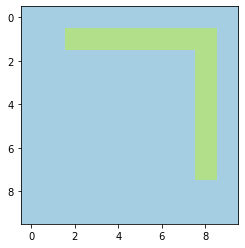

In [22]:
# Affichage de la grille
plt.imshow(grid.map, cmap='Paired', vmin=0, vmax=5)
plt.show()

### Définition d'une personne

In [23]:
def distance(X, Y):
    return int(np.abs(X[0]-Y[0])+np.abs(X[1]-Y[1]))

class Personne():
    def __init__(self, grid, Xinit, Yinit, Xsortie, Ysortie, debug):
        self.X = Xinit
        self.Y = Yinit
        self.Xsortie = Xsortie
        self.Ysortie = Ysortie
        self.debug = debug
        personneCrée = grid.SetPersonne(self)
        if personneCrée:
            debug.affiche("Création de la personne qui part de", Xinit, Yinit, "pour aller à", Xsortie, Ysortie)
    
    def getAvailableMove(self, grid): # retourne la liste triée des déplacements possibles
        # distance à la grille
        dist_actuel = distance((self.X, self.Y), (self.Xsortie, self.Ysortie))
        depl = []
        # on calcule la distance entre les case adjacente et la sortie
        for x in range(self.X-1, self.X+2):
            for y in range (self.Y-1, self.Y+2):
                if (x!=self.X or y!=self.Y) and (x==self.X or y==self.Y) and (x>=0 and y>=0 and x<grid.Xmax and y<grid.Ymax): # deplacement uniquement points cardinaux
                    # on est sur une case adjacente et on est sur la grille
                    if grid.isCellEmpty(x, y): # si la case est vide
                        dist = distance((self.Xsortie, self.Ysortie), (x,y))
                        if (dist<dist_actuel): # on se rappproche
                             depl.append((dist, x, y))
        return sorted(depl)

    def getBetterMove(self, grid):
        return self.getAvailableMove(grid)[0]

    def Move(self, grid, depl):
        debug.affiche("Déplacement de la personne de (", self.X, self.Y, ") à (", depl[1], depl[2], ")")
        grid.Set(self.X, self.Y, const.EMPTY)
        self.X = depl[1]
        self.Y = depl[2]
        grid.Set(self.X, self.Y, const.PERSONNE)
        
    def deplacePersonne(self, grid, debug):
        if self.X==self.Xsortie and self.Y==self.Ysortie:
            # la personne est arrivée à la sortie
            # on retire la personne de la liste
            grid.removePersonne(self)
            # on libere la case de sortie
            grid.Set(self.X, self.Y, const.EMPTY)
            return True, False
    
        # sinon on recherche les déplacements possibles
        availableMove = self.getAvailableMove(grid)
        debug.affiche("La personne (", self.X, self.Y, ") peut se déplacer sur :", availableMove)
            
        if len(availableMove)>0:
            # on se déplace sure la nouvelle case
            self.Move(grid, availableMove[0]) 
            return False, False
        
        # sinon aucun d"éplacement n'est possible
        if grid.UI==affichage.OpenCV:
            grid.Set(self.X, self.Y, const.IMMOBILE)
        debug.affiche("La personne (", self.X, self.Y, "ne peut pas se déplacer")
        return False, True

In [24]:
def read_personnes(file, grid, Personne, nombre, debug):
    # Lecture de la liste des personnes et placement sur la grille
    # s'arrête quand le nombre de personnes souhaité est atteind
    # Si nombre = -1, on lit jusqu'à la fin du fichier (idem si nombre est supérieur aux nombres de personnes dans le fichier)
    line = file.readline()
    while line[0]=='#':	# on saute les commentaires
        line = file.readline()
        
    while line:	# on lit jusqu'à la fin du fichier
        coordonnee = line.strip().split(' ')
        if coordonnee[0]!='#':
            assert (int(coordonnee[0])>0 and int(coordonnee[1])>0
                and int(coordonnee[2])<X or int(coordonnee[3])<Y) # La personne est sur la grille
            assert ((int(coordonnee[2])==0 or int(coordonnee[2])==X-1)  # elle sort sur un bord X
                and                                                  # et
                (int(coordonnee[3])==0 or int(coordonnee[3])==Y-1)) # elle sort sur un bord Y
            Personne(grid, int(coordonnee[0]), int(coordonnee[1]), int(coordonnee[2]), int(coordonnee[3]), debug)
            
        if len(grid.personneList)==nombre:
            debug.affiche(len(grid.personneList), "personnes ont été créées")
            file.close()
            return
        line = file.readline()
    debug.affiche("Fermeture du fichier")
    file.close()
    
    debug.affiche("On a lut tout le fichier,", len(grid.personneList), "personnes ont été créées")

In [25]:
# On lit toutes les personnes contenues dans le fichier de configuration
read_personnes(file, grid, Personne, -1, debug)

('Création de la personne qui part de', 2, 2, 'pour aller à', 0, 0)
('Création de la personne qui part de', 3, 3, 'pour aller à', 0, 9)
('Création de la personne qui part de', 6, 6, 'pour aller à', 9, 0)
('Création de la personne qui part de', 7, 7, 'pour aller à', 9, 9)
('Fermeture du fichier',)
('On a lut tout le fichier,', 4, 'personnes ont été créées')


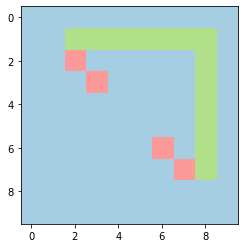

In [26]:
# Affichage de la grille
plt.imshow(grid.map, cmap='Paired', vmin=0, vmax=5)
plt.show()

### Construction d'une image pour OpenCV

In [27]:
# Uniquement nécessaire pour la visualisation en OpenCV
def createImage(image):
    X = image.shape[0]
    Y = image.shape[1]
    ZOOM = max(min(1024//X, 1024//Y), 1)
    img = np.zeros((X*ZOOM, Y*ZOOM, 3), dtype=np.float)
    for i in range(X):
        for t in range(ZOOM):
            for j in range(Y):
                for u in range(ZOOM):
                    if image[i][j]==const.EMPTY:
                        img[ZOOM*i+t][ZOOM*j+u]=affichage.EMPTY
                    elif image[i][j]==const.OBSTACLE:
                        img[ZOOM*i+t][ZOOM*j+u]=affichage.OBSTACLE
                    elif image[i][j]==const.PERSONNE:
                        img[ZOOM*i+t][ZOOM*j+u]=affichage.PERSONNE
                    elif image[i][j]==const.IMMOBILE:
                        img[ZOOM*i+t][ZOOM*j+u]=affichage.IMMOBILE
                    elif image[i][j]==const.ARRIVEE:  
                        img[ZOOM*i+t][ZOOM*j+u]=affichage.ARRIVEE
    return img

In [28]:
# Affichage en OpenCV de la grille créée
if UI==affichage.OpenCV:
    cv2.imshow("img", createImage(grid.map))
    cv2.waitKey(5000) # Affichage pendant 5 secondes
    cv2.destroyAllWindows()

## Utilisation des procédures précédentes pour créer une nouvelle grille qui sera sauvegardée dans un fichier

In [29]:
# Création d'une grille de 1024*1024
debug = Debug(True)
UI = affichage.Aucun

X = 1024
Y = 1024
grid = Grille(X, Y, UI, debug)

("Initilisation de l'objet grille",)


In [30]:
# La grille contient 2^4 obstacles
nb_obs = np.power(2,4)

coordonnee = np.zeros((4,1), dtype=np.int)
for i in range(nb_obs):
    for j in range(4):
        val_min = 1+50*i+np.random.randint(10)*10*j
        if j%2 == 0:
            val_max = min(1+val_min+np.random.randint(20), grid.Xmax)
        else:
            val_max = min(1+val_min+np.random.randint(20), grid.Ymax)
        coordonnee[j] = np.random.randint(val_min, val_max)
    
    assert (int(coordonnee[0])>0 and int(coordonnee[2])>0)
    assert (int(coordonnee[1])<X)
    assert (int(coordonnee[3])<Y)
    Obstacle(grid, int(coordonnee[0]), int(coordonnee[1]), int(coordonnee[2]), int(coordonnee[3]), debug)
    
debug.affiche(len(grid.obstacleList), "obstacles ont été créés")

("Création de l'obstacle (", 16, 53, ') - (', 11, 61, ')')
("Création de l'obstacle (", 60, 92, ') - (', 238, 331, ')')
("Création de l'obstacle (", 108, 175, ') - (', 286, 267, ')')
("Création de l'obstacle (", 153, 166, ') - (', 302, 429, ')')
("Création de l'obstacle (", 202, 248, ') - (', 263, 205, ')')
("Création de l'obstacle (", 252, 281, ') - (', 272, 313, ')')
("Création de l'obstacle (", 302, 380, ') - (', 470, 372, ')')
("Création de l'obstacle (", 355, 365, ') - (', 353, 597, ')')
("Création de l'obstacle (", 402, 423, ') - (', 473, 615, ')')
("Création de l'obstacle (", 454, 511, ') - (', 496, 642, ')')
("Création de l'obstacle (", 501, 562, ') - (', 572, 508, ')')
("Création de l'obstacle (", 554, 564, ') - (', 733, 554, ')')
("Création de l'obstacle (", 603, 674, ') - (', 684, 751, ')')
("Création de l'obstacle (", 653, 722, ') - (', 691, 712, ')')
("Création de l'obstacle (", 705, 741, ') - (', 701, 911, ')')
("Création de l'obstacle (", 755, 841, ') - (', 854, 844, ')'

In [31]:
# La grille contient 2^10 personnes
nb_person = np.power(2,10)

coordonnee = np.zeros((2,1), dtype=np.int)
sortie = np.zeros((2,1), dtype=np.int)
while len(grid.personneList)<nb_person:
    coordonnee[0] = np.random.randint(1,X)
    coordonnee[1] = np.random.randint(1,Y)
    sortie[0] = (X-1)*np.random.randint(2)
    sortie[1] = (Y-1)*np.random.randint(2)
    Personne(grid, int(coordonnee[0]), int(coordonnee[1]), int(sortie[0]), int(sortie[1]), debug)
    
debug.affiche(len(grid.personneList), "personnes ont été créées")

('Création de la personne qui part de', 584, 694, 'pour aller à', 0, 0)
('Création de la personne qui part de', 225, 194, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 899, 195, 'pour aller à', 0, 0)
('Création de la personne qui part de', 215, 116, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 924, 498, 'pour aller à', 0, 0)
('Création de la personne qui part de', 13, 465, 'pour aller à', 0, 1023)
('Création de la personne qui part de', 653, 671, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 393, 684, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 623, 779, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 761, 880, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 21, 429, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 142, 266, 'pour aller à', 0, 0)
('Création de la personne qui part de', 160, 581, 'pour aller à', 0, 1023)
('Création de la personn

('Création de la personne qui part de', 22, 982, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 905, 93, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 367, 754, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 402, 381, 'pour aller à', 0, 1023)
('Création de la personne qui part de', 553, 650, 'pour aller à', 0, 0)
('Création de la personne qui part de', 711, 946, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 127, 825, 'pour aller à', 0, 1023)
('Création de la personne qui part de', 904, 286, 'pour aller à', 0, 1023)
('Création de la personne qui part de', 75, 688, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 510, 24, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 83, 400, 'pour aller à', 1023, 1023)
('Création de la personne qui part de', 622, 984, 'pour aller à', 1023, 0)
('Création de la personne qui part de', 921, 685, 'pour aller à', 1023, 1023)
('Création de la p

In [32]:
# Sauvegarde de l'objet grille
grid.Save(grande_grille)

In [33]:
# Affichage de la grille créée
if UI==affichage.OpenCV:
    cv2.imshow("img", createImage(grid.map))
    cv2.waitKey(5000) # Affichage pendant 5 secondes
    cv2.destroyAllWindows()

## Solution itérative

Chaque personne doit rejoindre sa case de sortie. Le code est fourni à titre d'exemple. Il est malheureusement incomplet car si une personne ne peut pas rejoindre sa case de sortie alors la simulation ne s'arrête pas.

Si vous avez besoin de modifier les classes proposées. Il suffit de construire par héritage la nouvelle classe qui doit porter le même nom que la classe parente suffixé par \_1 ou \_2 ou \_3 selon l'étape du projet, et de surcharger les méthodes qui doivent l'être.

Les cellules suivantes donnent des exemples d'utilisation des primitives précédemment écrites.

### Avec trace mais sans visualisation

In [34]:
# En mode debug avec 1 personne, sans UI
debug = Debug(True)

file = open_file(petite_grille, debug)  # On ouvre le fichier
X, Y = read_grid_size(file, debug) # On lit la taille
grid = Grille(X, Y, affichage.Aucun, debug)     # On créée l'objet grille
read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
read_personnes(file, grid, Personne, 1, debug) # On lit et positionne une seule personne
print("*"*20)
print("Début de la simulation")
grid.Simulation()

('Ouverture du fichier', 'maps/map-initial.txt')
('Simulation pour une grille:', 10, '*', 10)
("Initilisation de l'objet grille",)
('obstacle non créé', ['-1', '-1', '-1', '-1'])
("Création de l'obstacle (", 1, 1, ') - (', 2, 7, ')')
("Création de l'obstacle (", 1, 7, ') - (', 8, 8, ')')
(2, 'obstacles ont été créés')
('Création de la personne qui part de', 2, 2, 'pour aller à', 0, 0)
(1, 'personnes ont été créées')
********************
Début de la simulation
('La personne (', 2, 2, ') peut se déplacer sur :', [(3, 2, 1)])
('Déplacement de la personne de (', 2, 2, ') à (', 2, 1, ')')
('La personne (', 2, 1, ') peut se déplacer sur :', [(2, 1, 1), (2, 2, 0)])
('Déplacement de la personne de (', 2, 1, ') à (', 1, 1, ')')
('La personne (', 1, 1, ') peut se déplacer sur :', [(1, 0, 1), (1, 1, 0)])
('Déplacement de la personne de (', 1, 1, ') à (', 0, 1, ')')
('La personne (', 0, 1, ') peut se déplacer sur :', [(0, 0, 0)])
('Déplacement de la personne de (', 0, 1, ') à (', 0, 0, ')')
('Une 

### Visualisation de chacune des itérations avec Matplotlib

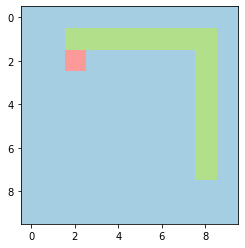

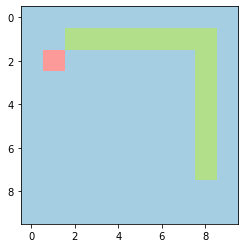

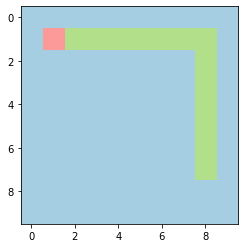

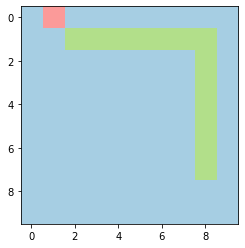

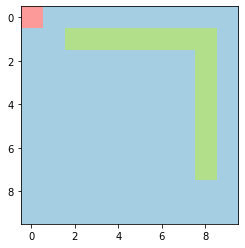

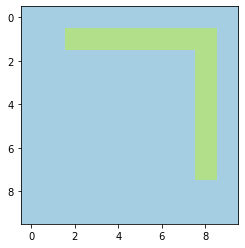

In [35]:
for img in grid.mapList:
    plt.imshow(img, cmap='Paired', vmin=0, vmax=5)
    plt.show()

### Visualisation de chacune des itérations avec OpenCV

In [36]:
if UI==affichage.OpenCV:
    for image in grid.mapList:
        cv2.imshow("img", createImage(image))
        cv2.waitKey(500) # Wait for 0.5 second
    cv2.destroyAllWindows()

### Sans trace mais avec visualisation

In [37]:
# En mode sans trace avec 1 personne mais avec UI
if UI==affichage.OpenCV:
    debug = Debug(False)
    file = open_file(petite_grille, debug)  # On ouvre le fichier
    X, Y = read_grid_size(file, debug) # On lit la taille
    grid = Grille(X, Y, affichage.OpenCV, debug)     # On créée l'objet grille
    read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
    read_personnes(file, grid, Personne, 1, debug) # On lit et positionne une seule personne
    grid.Simulation()

## Notre travail

Mettre en oeuvre plusieurs version du simulateur :
1. Version itérative : un seul flot d'exécution. Celui-ci est presque terminé, il faut reste à trouver une manière la plus judicieuse possible pour résoudre le problème des personnes bloquées par un obsatacle sans modifier le comportement d'une personne.
1. Version un flot d'exécution par personne. Attention a bien protéger par une section critique tout accès à une ressource concurrente que ce soit une trace d'exécution en mode debug ou une ressource partagée. On fera attention a reduire dans la mesure du possible la portée d'une section critique
1. Version un flot d'exécution pour un quard de la grille. Une personne de coordonnée X, Y sera gérée par le flot d'exécution numéro $i = 2* (Y//(Ymax//2)) + X//(Xmax//2)$.

Vous construirez ces différentes versions en créant si nécessaire des sous-classes aux classes existantes.



Bien évidemment, on attend une étude comparative des différentes approches. Pour vous aider dans l'analyse des solutions qui doivent être décrites vous utiliserez un nombre variable de personnes. Pour cela, vous adapterez le code suivant afin de pouvoir mesurer l'évolution du temps d'exécution en fonction du nombre de personnes présentes sur la grille et comparer les temps d'exécution entre les scénarios
<code>
debug = Debug(False)

duration_i = []  # i est le numéro du scénario
nb_personnes = []
for i in range(11):
    nb_personnes += [np.power(2, i)]
    print("*"*30)
    print("pour", nb_personnes[-1], "personnes")

    file = open_file(grande_grille, debug)  # On ouvre le fichier
    X, Y = read_grid_size(file, debug) # On lit la taille
    debug.affiche("simulation pour une grille:", X, Y)
    grid = Grille(X, Y, debug)     # On créée l'objet grille
    read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
    read_personnes(file, grid, Personne, nb_personnes[-1], debug) # On lit et positionne le nombre de personne souhaité seule personne
    debug.affiche("nbre de personnes", len(grid.personneList))
    
    start = time.time()
    grid.Simulation(debug)
    end = time.time()
    duration_i += [end-start]
    print("La simulation a duré", duration1[-1], "secondes")
    print("Il restait", XXXXX, "personnes immobiles")<code>

Vous ferez un plot de l'évolution des temps d'exécution
<code>
plt.plot(nb_personnes, duration_1, label="Une seule thread")
plt.plot(nb_personnes, duration_2, label="Une thread par personne")
plt.plot(nb_personnes, duration_2, label="Une thread par quard de terrain")
plt.xlabel("nombre de personnes")
plt.ylabel("temps en secondes")
plt.legend()
plt.show()<code>

Vous calculerez les ratios entre les scénarios
<code>
ratio_2 = []
ratio_3 = []
for i,j,k in zip(duration_1, duration_2, duration_3):
    ratio_2 += [j/i]
    ratio_3 += [k/i]
plt.plot(nb_personnes, ratio_2, label="...")
plt.plot(nb_personnes, ratio_3, label="...")
plt.xlabel("nombre de personnes")
plt.ylabel("...")
plt.legend()
plt.show()<code>

Vous calculerez aussi le speedup (inverse du ratio précédent) et ferez un plot de celui-ci

In [38]:
NB_OF_THREADS = 11

In [39]:
run_scenar1 = True
run_scenar2 = True
run_scenar3 = True


## Scénario 1 - version itérative

In [40]:
class Grille_1(Grille):
    waitersCount = 0
    
    # Crée un objet list
    def __init__(self, Xmax, Ymax, UI, debug):
        Grille.__init__(self, Xmax, Ymax, UI, debug)
    
    def Simulation(self):
        if self.debug.debug or self.UI==affichage.OpenCV:
            self.mapList.append(copy.copy(self.map))
        if self.UI==affichage.OpenCV:
            cv2.imshow("img", createImage(self.map))
            cv2.waitKey(500)
            
        moveMade = True
        while moveMade : # il y a encore une personne dans la liste qui peut bouger
            moveMade = False;
            self.waitersCount = 0
            for personne in self.personneList:
                end, immobile = personne.deplacePersonne(self, self.debug)
                if immobile==False:
                    moveMade = True
                else :
                    self.waitersCount+=1
                if end:
                    self.debug.affiche("Une personne vient de sortir, il reste", len(self.personneList), "personnes")
            if self.debug.debug or self.UI==affichage.OpenCV:
                self.mapList.append(copy.copy(self.map))
                if self.UI==affichage.OpenCV:
                    cv2.imshow("img", createImage(self.map))
                    cv2.waitKey(500)
    
        if self.UI==affichage.OpenCV:
            cv2.destroyAllWindows()

******************************
pour 1 personnes
La simulation a duré 0.028034448623657227 secondes
Il restait 0 personnes immobiles
******************************
pour 2 personnes
La simulation a duré 0.06799864768981934 secondes
Il restait 0 personnes immobiles
******************************
pour 4 personnes
La simulation a duré 0.13717007637023926 secondes
Il restait 0 personnes immobiles
******************************
pour 8 personnes
La simulation a duré 0.2169637680053711 secondes
Il restait 0 personnes immobiles
******************************
pour 16 personnes
La simulation a duré 0.3380401134490967 secondes
Il restait 0 personnes immobiles
******************************
pour 32 personnes
La simulation a duré 0.7047438621520996 secondes
Il restait 6 personnes immobiles
******************************
pour 64 personnes
La simulation a duré 1.807934045791626 secondes
Il restait 29 personnes immobiles
******************************
pour 128 personnes
La simulation a duré 5.0899937152

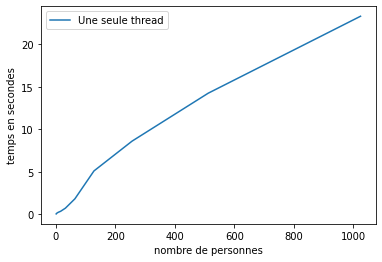

In [43]:
''' plot du temps d'exécution en fonction du nombre de personnes '''
if run_scenar1:
    debug = Debug(False)
    
    duration_1 = []  # i est le numéro du scénario
    nb_personnes = []
    for i in range(NB_OF_THREADS):
        nb_personnes += [np.power(2, i)]
        print("*"*30)
        print("pour", nb_personnes[-1], "personnes")
    
        file = open_file(grande_grille, debug)  # On ouvre le fichier
        X, Y = read_grid_size(file, debug) # On lit la taille
        debug.affiche("simulation pour une grille:", X, Y)
        grid = Grille_1(X, Y,affichage.Aucun, debug)     # On créée l'objet grille
        read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
        read_personnes(file, grid, Personne, nb_personnes[-1], debug) # On lit et positionne le nombre de personne souhaité seule personne
        debug.affiche("nbre de personnes", len(grid.personneList))
    
        start = time.time()
        grid.Simulation()
        end = time.time()
        duration_1 += [end-start]
        print("La simulation a duré", duration_1[-1], "secondes")
        print("Il restait", grid.waitersCount, "personnes immobiles")
    
    # Vous ferez un plot de l'évolution des temps d'exécution
    plt.plot(nb_personnes, duration_1, label="Une seule thread")
    #plt.plot(nb_personnes, duration_2, label="Une thread par personne")
    #plt.plot(nb_personnes, duration_2, label="Une thread par quard de terrain")
    plt.xlabel("nombre de personnes")
    plt.ylabel("temps en secondes")
    plt.legend()
    plt.show()  


Notre analyse du scénario 1 :

Pour ce scénario nous avons proposé une solution qui permet la vérification d'un mouvement effectué durant ce tour. Si tel est le cas, la simulation continue, sinon elle s'arrête. 

On peut voir sur le graph que le temps d'execution de cette solution augmente de façon approximativement linéaire.

## Scénario 2 - version 1 thread par personne

In [44]:
import sys

class Grille_2(Grille):
    waiters = 0
    threads = []
    
    # Crée un objet list
    def __init__(self, Xmax, Ymax, UI, debug):
        Grille.__init__(self, Xmax, Ymax, UI, debug)
        self.waitersLock = threading.Lock();
        self.mapLock = threading.Lock();
        self.useAvailable = threading.Condition(self.mapLock)
        
    def addWaiter(self):
        with self.waitersLock :
            self.waiters+=1
            
            # si c'est la dernière personne encore en mouvement, 
            # arrete la thread courante après avoir
            # reveilé les autre en attente pour qu'ils se terminent à leur tour
            if self.waiters>=len(self.personneList):
                if self.mapLock.locked() :
                    self.useAvailable.notifyAll()
                sys.exit(1)
        
    def removeWaiter(self):
        with self.waitersLock :
            self.waiters-=1
    
    def removePersonne(self, personne):
        with self.waitersLock :
            Grille.removePersonne(self, personne)
        
        
    def isCellEmpty(self, x, y):
        # les personne ne se considère plus comme des obstacles les unes des autres
        return self.Get(x,y)!=const.OBSTACLE
    
    def Get(self, x, y):
        return self.map[x][y]
    
    def Set(self, x, y, status):
        with self.mapLock :
            if status == const.EMPTY:
                # place est libéré
                Grille.Set(self, x, y, status)
                self.useAvailable.notifyAll()
            else :
                if status == const.PERSONNE:
                    # une personne convoite une place
                    while self.Get(x,y) != const.EMPTY:
                        # la place est prise 
                        # je me met en attente et m'enregistre en tant que tel
                        self.addWaiter()
                        self.useAvailable.wait()
                        self.removeWaiter()
                Grille.Set(self, x, y, status)
            
    # lance la simulation de la personne sur une nouvelle thread
    def RunThread(self, personne):
        x = threading.Thread(target=self.PersonneSimulation, args=(personne,))
        self.threads.append(x)
        x.start()
            
    # simulation d'une seul personne
    def PersonneSimulation(self, personne):
        self.debug.affiche("Une personne vient de se mettre a marcher")
        while(True):
            try :
                end, immobile = personne.deplacePersonne(self, self.debug)
            except Exception as e:
                self.debug.affiche(bcolors.BOLD,"ERROR APPEND HERE",bcolors.ENDC)
                raise e

            if immobile:
                self.debug.affiche("Une personne vient de se bloquer") # face à un mur
                self.addWaiter()
                break
            if end:
                self.debug.affiche("Une personne vient de sortir, il reste", len(self.personneList), "personnes")
                break


    def Simulation(self):
        if self.debug.debug or self.UI==affichage.OpenCV:
            self.mapList.append(copy.copy(self.map))
        if self.UI==affichage.OpenCV:
            cv2.imshow("img", createImage(self.map))
            cv2.waitKey(500)

        # run all thread
        personneListCopy = self.personneList.copy()
        for personne in personneListCopy:                
            self.RunThread(personne)
        # wait for all thread
        while len(self.threads)>0: 
            self.threads.pop(0).join()

        if self.debug.debug or self.UI==affichage.OpenCV:
                self.mapList.append(copy.copy(self.map))
                if self.UI==affichage.OpenCV:
                    cv2.imshow("img", createImage(self.map))
                    cv2.waitKey(500)

        if self.UI==affichage.OpenCV:
            cv2.destroyAllWindows()

In [45]:
class Personne_2(Personne):
    def __init__(self, grid, Xinit, Yinit, Xsortie, Ysortie, debug):
        Personne.__init__(self, grid, Xinit, Yinit, Xsortie, Ysortie, debug)

    def Move(self, grid, depl):
        # place la personne sur la nouvelle case AVANT de liberer l'ancienne
        debug.affiche("Déplacement de la personne de (", self.X, self.Y, ") à (", depl[1], depl[2], ")")
        grid.Set(depl[1], depl[2], const.PERSONNE)
        grid.Set(self.X, self.Y, const.EMPTY)
        self.X = depl[1]
        self.Y = depl[2]

******************************
pour 1 personnes
La simulation a duré 0.03300046920776367 secondes
Il restait 0 personnes immobiles
******************************
pour 2 personnes
La simulation a duré 0.07700109481811523 secondes
Il restait 0 personnes immobiles
******************************
pour 4 personnes
La simulation a duré 0.15702414512634277 secondes
Il restait 0 personnes immobiles
******************************
pour 8 personnes
La simulation a duré 0.2492814064025879 secondes
Il restait 0 personnes immobiles
******************************
pour 16 personnes
La simulation a duré 0.40693187713623047 secondes
Il restait 0 personnes immobiles
******************************
pour 32 personnes
La simulation a duré 1.2166121006011963 secondes
Il restait 0 personnes immobiles
******************************
pour 64 personnes
La simulation a duré 3.9540016651153564 secondes
Il restait 29 personnes immobiles
******************************
pour 128 personnes
La simulation a duré 8.271004676

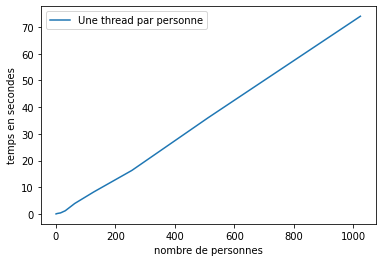

In [48]:
if run_scenar2:
    ''' plot du temps d'exécution en fonction du nombre de personnes '''
    
    debug = Debug(False)
    
    duration_2 = []  # i est le numéro du scénario
    nb_personnes = []
    for i in range(NB_OF_THREADS):
        nb_personnes += [np.power(2, i)]
        if nb_personnes[-1] != 8 and False:
            continue
        print("*"*30)
        print("pour", nb_personnes[-1], "personnes")
    
        file = open_file(grande_grille, debug)  # On ouvre le fichier
        X, Y = read_grid_size(file, debug) # On lit la taille
        debug.affiche("simulation pour une grille:", X, Y)
        grid = Grille_2(X, Y,affichage.Aucun, debug)     # On créée l'objet grille
        read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
        read_personnes(file, grid, Personne_2, nb_personnes[-1], debug) # On lit et positionne le nombre de personne souhaité seule personne
        debug.affiche("nbre de personnes", len(grid.personneList))
    
        start = time.time()
        grid.Simulation()
        end = time.time()
        duration_2 += [end-start]
        print("La simulation a duré", duration_2[-1], "secondes")
        print("Il restait", grid.waiters, "personnes immobiles")
    
    #Vous ferez un plot de l'évolution des temps d'exécution
    #plt.plot(nb_personnes, duration_1, label="Une seule thread")
    plt.plot(nb_personnes, duration_2, label="Une thread par personne")
    #plt.plot(nb_personnes, duration_2, label="Une thread par quard de terrain")
    plt.xlabel("nombre de personnes")
    plt.ylabel("temps en secondes")
    plt.legend()
    plt.show()

Dans ce scénario nous avons simulé le mouvement d'une foule, en utilisant 1 thread par personne

Pour cela nous avons surchargé la classe Grille en Grille_2 et la class Personne en Personne_2.
Afin de gérer les différents conflits entre les personnes dû à leurs déplacements parallèles, nous avons transformé la grille en équivalent de monitor. De plus, afin de pouvoir exécuter en parallèles les résonnements et déplacements des personnes, nous avons fait en sorte que les personnes ne se considèrent plus comme obstacle l'un l'autre.
Si A rencontre une autre personne B sur la case qu'elle convoite, elle va attendre (avec wait()) tant que la personne B n'a pas bougé. 
Et ainsi Si B bouge, A pourra se déplacer à son tour sur la case dans laquelle se trouvait B. (à noter que A est réveillé par un notifyAll a chaque déplacement d'une personne).
Pendant son temps d'attente, A est compté comme personne en attente.
Si A se retrouve être la dernière personne qui était encore en mouvement, elle arrête son exécution et utilise notifyAll(), afin de réveiller les thread en attente, pour qu'ils arrêtent leur exécution à leur tour.

En conclusion, on peut voir sur le graph que le temps d'exécution de cette solution augmente de façon approximativement linéaire. Cependant, on observe que la version 2 a tendance à être un peu plus efficace pour peu de personnes (nombre de personnes < 32). 
Néanmoins, pour 1024 personnes, le scénario 2 à un temps d'exécution environ 3 fois plus grand que dans le scénario 1.
*(Attention ! Ces affirmations peuvent varier d'une simulation à l'autre)*

## Scénario 3 - version 1 thread pour 1/4 de la grille

In [50]:
class Grille_3(Grille):
    waitersCount = 0
    nbListByLine = 2

    
    # Crée un objet list
    def __init__(self, Xmax, Ymax, UI, debug):
        Grille.__init__(self, Xmax, Ymax, UI, debug)
        
        self.waitersCounts = []
        self.personneLists = []
        self.threads = []
        self.partLocks = []
        self.threadCreationLock = threading.Lock()
        self.listAccessLock = threading.Lock()
        
    def initLists(self):
        self.personneLists.clear()
        self.partLocks.clear()
        self.waitersCounts.clear()
        for i in range(0, self.nbListByLine):
            for j in range(0, self.nbListByLine):
                self.personneLists.append([])  
                self.partLocks.append(threading.Lock())
                self.waitersCounts.append(0)
        for personne in self.personneList:
            index = self.getListIndexOf(personne.X, personne.Y)
            self.personneLists[index].append(personne)  
        
    def removePersonne(self,personne):
        with self.listAccessLock:
            self.personneList.remove(personne) 
            part = self.getListIndexOf(personne.X,personne.Y)
            self.personneLists[part].remove(personne)

        
    def getListIndexOf(self, x, y):
        numCol = min(x//(self.Xmax/self.nbListByLine),self.nbListByLine-1)
        numLine = min(y//(self.Ymax/self.nbListByLine),self.nbListByLine-1)
        return (int)(numCol+numLine*self.nbListByLine)
    
    def changeGridPart(self, personne, ancient_index,new_index):
        with self.listAccessLock:
            self.personneLists[ancient_index].remove(personne)
            self.personneLists[new_index].append(personne)
        self.runThread(new_index)
        
        
    def SimulationPart(self, part_number):
        self.debug.affiche("Reprise de la simulation de la partie ", part_number)
        moveMade = True
        while moveMade : # il y a encore une personne dans la liste qui peut bouger
            moveMade = False;
            self.waitersCounts[part_number] = 0
            with self.listAccessLock:
                myList = self.personneLists[part_number].copy()
            for personne in myList:
                with self.partLocks[part_number]:
                    end, immobile = personne.deplacePersonne(self, self.debug)
                    if immobile==False:
                        moveMade = True
                    else :
                        self.waitersCounts[part_number]+=1
                    if end:
                        self.debug.affiche("Une personne vient de sortir depuis la zone ",part_number,", il reste", len(self.personneList), "personnes au total et ",len(self.personneLists[part_number]),"personnes dans cette zone")
        self.debug.affiche("Fin de la simulation de la partie ", part_number)
    
    def runThread(self, part_number):
        with self.threadCreationLock:
            if self.threads[part_number].is_alive():
                return
            x = threading.Thread(target=self.SimulationPart, args=(part_number,))
            self.threads[part_number] = x
            x.start()
    
    def Simulation(self):
        self.initLists()
        self.threads.clear()
        if self.debug.debug or self.UI==affichage.OpenCV:
            self.mapList.append(copy.copy(self.map))
        if self.UI==affichage.OpenCV:
            cv2.imshow("img", createImage(self.map))
            cv2.waitKey(500)
        
        # create all thread
        with self.threadCreationLock:
            for i in range(0,self.nbListByLine*self.nbListByLine): 
                x = threading.Thread(target=self.SimulationPart, args=(i,))
                self.threads.append(x)
            # run all thread
            for thread in self.threads:
                thread.start()
        # wait all thread
        someOneAlive = True
        while someOneAlive :
            someOneAlive = False
            for i in range(0,self.nbListByLine*self.nbListByLine):
                if self.threads[i].is_alive():
                    self.threads[i].join()
                    someOneAlive = True
        
        self.waitersCount = sum(self.waitersCounts)
                    
        if self.debug.debug or self.UI==affichage.OpenCV:
            self.mapList.append(copy.copy(self.map))
            if self.UI==affichage.OpenCV:
                cv2.imshow("img", createImage(self.map))
                cv2.waitKey(500)
    
        if self.UI==affichage.OpenCV:
            cv2.destroyAllWindows()

In [51]:
class Personne_3(Personne):
    
    def __init__(self, grid, Xinit, Yinit, Xsortie, Ysortie, debug):
        Personne.__init__(self, grid, Xinit, Yinit, Xsortie, Ysortie, debug)

        
        
    def deplacePersonne(self, grid, debug):
        if self.X==self.Xsortie and self.Y==self.Ysortie:
            # la personne est arrivée à la sortie
            # on retire la personne de la liste
            grid.removePersonne(self)
            # on libere la case de sortie
            grid.Set(self.X, self.Y, const.EMPTY)
            return True, False
    
        # sinon on recherche les déplacements possibles
        availableMove = self.getAvailableMove(grid)
        debug.affiche("La personne (", self.X, self.Y, ") peut se déplacer sur :", availableMove)
            
        if len(availableMove)>0:
            deplacementChoisi = availableMove[0]
            ancient_index = grid.getListIndexOf(self.X, self.Y)
            new_index = grid.getListIndexOf(deplacementChoisi[1], deplacementChoisi[2])
            if ancient_index == new_index :
                self.Move(grid, deplacementChoisi) 
                return False, False
            else :
                if grid.partLocks[new_index].acquire(True, 0.1):
                    if grid.isCellEmpty(deplacementChoisi[1], deplacementChoisi[2]):
                        self.Move(grid, deplacementChoisi) 
                        grid.changeGridPart(self, ancient_index, new_index)
                        grid.partLocks[new_index].release()
                        return False, False
                    grid.partLocks[new_index].release()
        
        # sinon aucun d"éplacement n'est possible
        if grid.UI==affichage.OpenCV:
            grid.Set(self.X, self.Y, const.IMMOBILE)
        debug.affiche("La personne (", self.X, self.Y, "ne peut pas se déplacer")
        return False, True

******************************
pour 1 personnes
La simulation a duré 0.04200029373168945 secondes
Il restait 0 personnes immobiles
******************************
pour 2 personnes
La simulation a duré 0.07999825477600098 secondes
Il restait 0 personnes immobiles
******************************
pour 4 personnes
La simulation a duré 0.15201044082641602 secondes
Il restait 1 personnes immobiles
******************************
pour 8 personnes
La simulation a duré 0.26400089263916016 secondes
Il restait 1 personnes immobiles
******************************
pour 16 personnes
La simulation a duré 0.41699838638305664 secondes
Il restait 2 personnes immobiles
******************************
pour 32 personnes
La simulation a duré 1.2332520484924316 secondes
Il restait 7 personnes immobiles
******************************
pour 64 personnes
La simulation a duré 2.3308634757995605 secondes
Il restait 28 personnes immobiles
******************************
pour 128 personnes
La simulation a duré 4.72402715

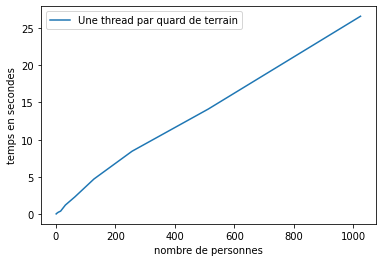

In [55]:
if run_scenar3:
    ''' plot du temps d'exécution en fonction du nombre de personnes '''
    
    debug = Debug(False)
    
    duration_3 = []  # i est le numéro du scénario
    nb_personnes = []
    for i in range(NB_OF_THREADS):
        nb_personnes += [np.power(2, i)]
        if nb_personnes[-1] != 8 and False:
            continue
        print("*"*30)
        print("pour", nb_personnes[-1], "personnes")
    
        file = open_file(grande_grille, debug)  # On ouvre le fichier
        X, Y = read_grid_size(file, debug) # On lit la taille
        debug.affiche("simulation pour une grille:", X, Y)
        grid = Grille_3(X, Y,affichage.Aucun, debug)     # On créée l'objet grille
        read_obstacles(file, grid, Obstacle, debug)  # On lit et positionne les obstacles
        read_personnes(file, grid, Personne_3, nb_personnes[-1], debug) # On lit et positionne le nombre de personne souhaité seule personne
        debug.affiche("nbre de personnes", len(grid.personneList))
    
    
        start = time.time()
        grid.Simulation()
        end = time.time()
        duration_3 += [end-start]
        print("La simulation a duré", duration_3[-1], "secondes")
        print("Il restait", grid.waitersCount, "personnes immobiles")
    
    #Vous ferez un plot de l'évolution des temps d'exécution
    #plt.plot(nb_personnes, duration_1, label="Une seule thread")
    #plt.plot(nb_personnes, duration_2, label="Une thread par personne")
    plt.plot(nb_personnes, duration_3, label="Une thread par quard de terrain")
    plt.xlabel("nombre de personnes")
    plt.ylabel("temps en secondes")
    plt.legend()
    plt.show()


<h2>Explication du scénario 3 :</h2>

Dans cette solution nous avons surchargé la classe Personne_3 et Grille_3 afin de résoudre le problème de division de la grille nous avons utilisé une liste de liste de personne, la taille de cette liste étant 4 (nombre des sous grille) et chaque case, contient tous les personnes (donc une liste de personne) qui se trouvent dans ce quart de la grille. Afin, de gérer le problème d'interblocage nous avons initialisé un tableau de locks qui va bloquer le quart de la grille quand une personne s'y déplace ou quand une personne veut se déplacer d'un autre quart à celui-ci.


En Conclusion, la solution du scénario 3 est la solution la plus optimale, car elle permet de déplacer la foule (en même temps), sans consommer beaucoup de ressource de la mémoire. 

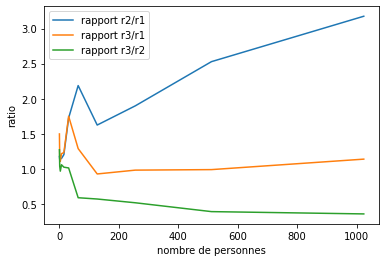

In [67]:
ratio_2 = []
ratio_3 = []
ratio_4 = []
for i,j,k in zip(duration_1, duration_2, duration_3):
    ratio_2 += [j/i]
    ratio_3 += [k/i]
    ratio_4 += [k/j]
plt.plot(nb_personnes, ratio_2, label="rapport r2/r1")
plt.plot(nb_personnes, ratio_3, label="rapport r3/r1")
plt.plot(nb_personnes, ratio_4, label="rapport r3/r2")
plt.xlabel("nombre de personnes")
plt.ylabel("ratio")
plt.legend()
plt.show()

## Comparaison des trois approches

<span style="color:red">On attend ici une comparaison argumentée permettant de mettre en évidence les points forts et les points faibles des différentes solutions</span><br>


<table style = "border: 2px solid black; border-collapse: collapse;">
    <tr>
        <th>Scénarios</th>
        <th style ="border:solid; text-align: center">Points forts</th>
        <th style ="border:solid; text-align: center">Points faibles</th>
    </tr>
    <tr>
        <th style ="border:solid; text-align: center">1</th>
        <th style ="border:solid; text-align: center">Solution simple, naif et directe. Cette solution a un avantage d'être très rapide à programmer et à comprendre.</th>
        <th style ="border:solid; text-align: center">Certes cette solution est rapide à programmer, par contre on ne donne pas la chance au programme de diviser son travail.</th>
    </tr>
    <tr>
        <th style ="border:solid; text-align: center">2</th>
        <th style ="border:solid; text-align: center">Permet la distribution du travail entre plusieurs threads.</th>
        <th style ="border:solid; text-align: center">Dans cette solution nous utilisons un thread par personne, cela peut être coûteux car trop de thread peut être gourmand en termes de ressource.</th>
    </tr>
    <tr>
        <th style ="border:solid; text-align: center">3</th>
        <th style ="border:solid; text-align: center">Garde l'avantage du scénario 2 sans avec une gestion plus propre et efficace en termes de ressource. Cette solution permet de donner la chance à une personne de pouvoir se déplacer sur la grille sans pour autant surcharger le processus de threads.</th>
        <th style ="border:solid; text-align: center">Risque d'interblocage dans le cas où deux personne de quarts différent A et B souhaite se rendre respectivement dans les quarts B et A au même moment. Cet interblocage a été résolu par un timeout ce qui peut conduire à des variations de temps d'exécution selon le placement des personnes.</th>
    </tr>
</table>

## Export du notebook dans un fichier python

In [ ]:
import sys,json
import ipyparams

def convertNotebook(notebookPath, modulePath):
    f = open(notebookPath, 'r') #input.ipynb
    j = json.load(f)

    of = open(modulePath, 'w') #output.py

    if j["nbformat"] >=4:
        for i,cell in enumerate(j["cells"]):
            if cell['cell_type']=='code':
                of.write("#cell "+str(i+1)+"\n")
                for line in cell["source"]:
                    of.write(line)
                of.write('\n\n')
    else:
        print("not implemented")

    of.close()

In [ ]:
''' Remarks: it is necessary to put the import code in a separate cell above the call of function.
Otherwise Jupyter will try to run the code before the library is fully loaded,
so the currentNotebook variable is still blank.

Putting the import in its own cell forces it to load before moving to the next cell.
'''
if is_running_from_ipython():
    currentNotebook = ipyparams.notebook_name
    pythonName = currentNotebook.split(".")[0]+".py"

    convertNotebook(currentNotebook, pythonName)